In [1]:
%load_ext autoreload
%autoreload 2

import yaml
import torch
import matplotlib.pyplot as plt

In [2]:
config_file = './configs/PSIML_tiny.yaml'
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)

In [3]:
from utils.DataLoaderReal import DataLoaderReal

data_loader = DataLoaderReal(config['data'])

images, poses, focal = data_loader.getDataset('train', True)

In [4]:
device = 'cpu'
if torch.cuda.is_available():
    device = torch.cuda.current_device()

In [5]:
from utils.Camera import Camera

cameras = []
H, W = images[0].shape[:2]

for i in range(images.shape[0]):
    cameras.append(Camera(H, W, poses[i], focal, device))


In [6]:
from utils.Renderer import Renderer

renderer = Renderer(config['renderer'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
6
Epoch: 0, Average loss: 0.02838427759706974, Secs per iter: 7.6883286237716675
Test PSNR: 7.943081378936768


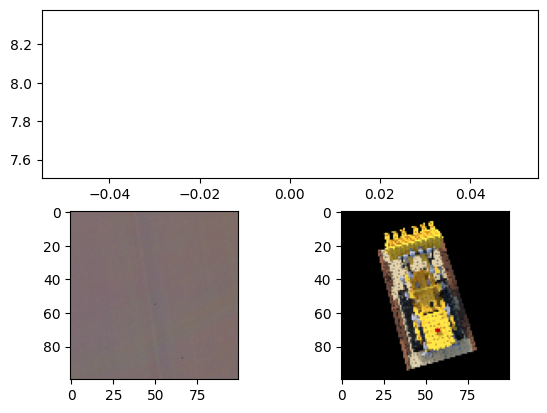

KeyboardInterrupt: 

In [7]:
%load_ext autoreload
%autoreload 2


from models.TinyNerf import TinyNerf
from utils.TrainerTinyNerf import TrainerTinyNerf
import imageio.v3 as iio
import torch.nn as nn

test_imgs, test_poses, focal = data_loader.getDataset('validation', True)
test_img = test_imgs[0]
test_pose = test_poses[0]

test_pose = torch.tensor([
                [
                    -0.963964581489563,
                    -0.2611401677131653,
                    0.0507759265601635,
                    0.2046843022108078
                ],
                [
                    0.26603081822395325,
                    -0.9462433457374573,
                    0.18398693203926086,
                    0.7416750192642212
                ],
                [
                    7.450580596923828e-09,
                    0.1908649355173111,
                    0.9816163182258606,
                    3.957021951675415
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    1.0
                ]
            ])

model = TinyNerf(config['model']['L_xyz'])

def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)
trainer = TrainerTinyNerf(model, device, images, cameras, renderer, config['trainer'])
trainer.train(test_img[None,...], test_pose[None,...], focal)